In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
# For loading saved Neural Network
from keras.models import model_from_json


In [3]:
cur_path = "C:/Users/AREF FALLAH/Documents/McMaster Universiy/McMaster Projects/Kaggle Induction Motor Fault Detection/KaggleData/"

In [4]:
normal_file_names = glob.glob(cur_path + '/normal/*.csv')
imnormal_file_names_6g = glob.glob(cur_path+'/imbalance/6g/*.csv')
imnormal_file_names_10g = glob.glob(cur_path+'/imbalance/10g/*.csv')
imnormal_file_names_15g = glob.glob(cur_path+'/imbalance\\15g/*.csv')
imnormal_file_names_20g = glob.glob(cur_path+'/imbalance\\20g/*.csv')
imnormal_file_names_25g = glob.glob(cur_path+'/imbalance\\25g/*.csv')
imnormal_file_names_30g = glob.glob(cur_path+'/imbalance\\30g/*.csv')


In [5]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i, header=None)
        data_n = pd.concat([data_n, low_data], ignore_index=True)
    return data_n


In [17]:
data_n = dataReader(normal_file_names)
data_6g = dataReader(imnormal_file_names_6g)
data_10g = dataReader(imnormal_file_names_10g)
data_15g = dataReader(imnormal_file_names_15g)
data_20g = dataReader(imnormal_file_names_20g)
data_25g = dataReader(imnormal_file_names_25g)
data_30g = dataReader(imnormal_file_names_30g)


In [7]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7250000 entries, 0 to 7249999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
dtypes: float64(8)
memory usage: 442.5 MB


In [8]:
def downSampler(data, a, b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(
            data.iloc[a:b, :].sum()/x, ignore_index=True)
        a += x
        b += x
    return data_decreased


In [9]:
def TimeIntervalDataset(dataset, Interval = 1000):
	DataSubset = []
	for i in range(int(len(dataset)/Interval)):
		dummy = dataset.iloc[i:i+Interval].values
		DataSubset.append(dummy)
	return np.array(DataSubset)

In [12]:
a = []
a = TimeIntervalDataset(data_n)

In [10]:
data_n = downSampler(data_n, 0, 5000)
data_6g = downSampler(data_6g, 0, 5000)
data_10g = downSampler(data_10g, 0, 5000)
data_15g = downSampler(data_15g, 0, 5000)
data_20g = downSampler(data_20g, 0, 5000)
data_25g = downSampler(data_25g, 0, 5000)
data_30g = downSampler(data_30g, 0, 5000)


In [11]:
from scipy import signal


def FFT(data):
    autocorr = signal.fftconvolve(data, data[::-1], mode='full')
    return pd.DataFrame(autocorr)


In [12]:
from scipy import signal


def InvFFT(data):
    autocorr = signal.fftconvolve(data, data[::-1], mode='full')
    return pd.DataFrame(autocorr)


In [61]:
data_n1 = FFT(data_n[0:10000])
data_6g = FFT(data_6g)
data_10g = FFT(data_10g)
data_15g = FFT(data_15g)
data_20g = FFT(data_20g)
data_25g = FFT(data_25g)
data_30g = FFT(data_30g)


In [62]:
data_n2 = data_n[0:10000]
data_n3 = FFT(data_n2[:][0])
data_n3 = np.array(data_n3[:][0])
PSD = data_n3*np.conj(data_n3)/len(data_n3)


In [63]:
indices = PSD < 5000
data_n3_Clean = PSD * indices
fhat = indices*data_n3
ffilt = np.fft.ifft(fhat)
Truncated = ffilt[1000:7000]

In [65]:
import numpy
numpy.savetxt("FFT.csv", [data_n3, data_n3], delimiter=",")

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


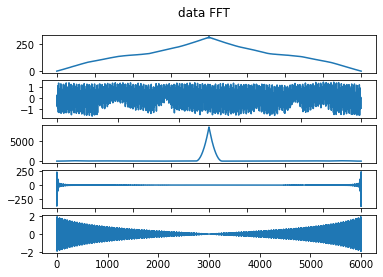

In [50]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(5)
fig.suptitle('data FFT')
x1 = np.arange(0, data_n1.shape[0])
x2 = np.arange(0, data_n2.shape[0])
x3 = np.arange(0, len(PSD))
x4 = np.arange(0, len(ffilt))
x5 = np.arange(0, len(Truncated))
axs[0].plot(x1,data_n1[:][0])
axs[1].plot(x2, data_n2[:][1])
axs[2].plot(x3, PSD)
axs[3].plot(x4, ffilt)
axs[4].plot(x5, Truncated)


In [19]:
y_1 = pd.DataFrame(np.ones(int(len(data_n)), dtype=int))
y_2 = pd.DataFrame(np.zeros(int(len(data_6g)), dtype=int))
y_3 = pd.DataFrame(np.full((int(len(data_10g)), 1), 2))
y_4 = pd.DataFrame(np.full((int(len(data_15g)), 1), 3))
y_5 = pd.DataFrame(np.full((int(len(data_20g)), 1), 4))
y_6 = pd.DataFrame(np.full((int(len(data_25g)), 1), 5))
y_7 = pd.DataFrame(np.full((int(len(data_30g)), 1), 6))
y = pd.concat([y_1, y_2, y_3, y_4, y_5, y_6, y_7], ignore_index=True)
y


,0
0,1
1,1
2,1
3,1
4,1
...,...
33688,6
33689,6
33690,6
33691,6


In [12]:
data = pd.concat([data_n, data_6g, data_10g, data_15g,
                 data_20g, data_25g, data_30g], ignore_index=True)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.25, shuffle=True)


In [14]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))


Shape of Train Data : (25269, 15)
Shape of Test Data : (8424, 15)


In [15]:
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train, y_train)
print("SVM accuracy is {} on Train Dataset".format(svm.score(X_train, y_train)))
print("SVM accuracy is {} on Test Dataset".format(svm.score(X_test, y_test)))


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVM accuracy is 0.5721635205192133 on Train Dataset
SVM accuracy is 0.5719373219373219 on Test Dataset


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  # n_neighbors = k
knn.fit(X_train, y_train)
print("k={}NN Accuracy on Train Data: {}".format(3, knn.score(X_train, y_train)))
print("k={}NN Accuracy on Test Data: {}".format(3, knn.score(X_test, y_test)))


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=3NN Accuracy on Train Data: 0.9037951640349836
k=3NN Accuracy on Test Data: 0.6017331433998101


In [17]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(
    15,), kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(7, activation='softmax', kernel_initializer='random_uniform'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 231       
Total params: 21,511
Trainable params: 21,511
Non-trainable params: 0
____________________________________________________

In [20]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [21]:
hist = model.fit(X_train, y_train, epochs=20, validation_split=0.2)


Epoch 1/20
632/632 [==============================] - 1s 1ms/step - loss: 1.4393 - accuracy: 0.3618 - val_loss: 1.1789 - val_accuracy: 0.4713
Epoch 2/20
632/632 [==============================] - 1s 2ms/step - loss: 1.0618 - accuracy: 0.5349 - val_loss: 1.0266 - val_accuracy: 0.5673
Epoch 3/20
632/632 [==============================] - 1s 1ms/step - loss: 0.8583 - accuracy: 0.6566 - val_loss: 0.7606 - val_accuracy: 0.7004
Epoch 4/20
632/632 [==============================] - 1s 2ms/step - loss: 0.6976 - accuracy: 0.7305 - val_loss: 0.7107 - val_accuracy: 0.7384
Epoch 5/20
632/632 [==============================] - 1s 1ms/step - loss: 0.6075 - accuracy: 0.7609 - val_loss: 0.6006 - val_accuracy: 0.7681
Epoch 6/20
632/632 [==============================] - 1s 1ms/step - loss: 0.5466 - accuracy: 0.7813 - val_loss: 0.4965 - val_accuracy: 0.8008
Epoch 7/20
632/632 [==============================] - 1s 1ms/step - loss: 0.4893 - accuracy: 0.8024 - val_loss: 0.4544 - val_accuracy: 0.8114
Epoch 

In [24]:

# # Save Neural Network
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")


Saved model to disk


In [26]:
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")


Loaded model from disk


In [ ]:
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy',
#                     optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


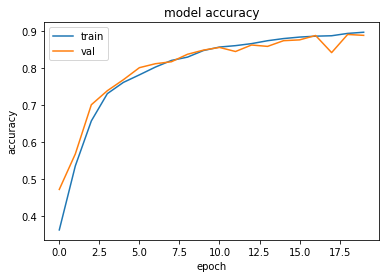

In [27]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


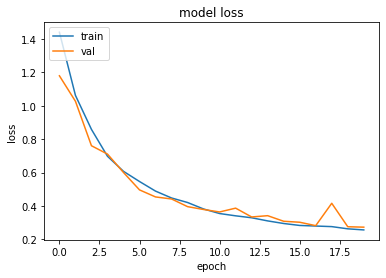

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
